In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv("life_expect.csv")

print(df.isnull().sum())
df.tail()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.0,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.0,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.0,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.0,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8
2937,Zimbabwe,2000,Developing,46.0,665.0,24,1.68,0.0,79.0,1483,...,78.0,7.10,78.0,43.5,547.358879,12222251.0,11.0,11.2,0.434,9.8


(2938, 22)
Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


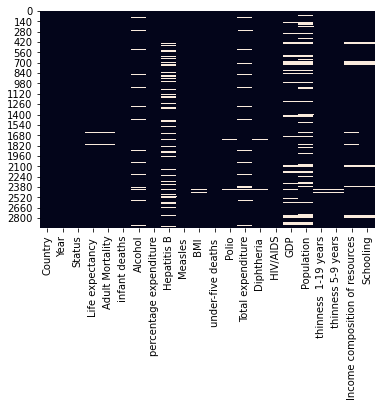

In [3]:
print(df.shape)
print(df.columns)
sns.heatmap(df.isnull(), cbar=False)


In [4]:
df.drop(labels=['Hepatitis B',' HIV/AIDS', 'GDP','Population','Country', 'Year', 'Status',], inplace= True, axis = 1)


In [5]:
df['Alcohol'].fillna(df["Alcohol"].mean(), inplace=True)
df['Life expectancy '].fillna(df['Life expectancy '].mean(), inplace=True)
df['Adult Mortality'].fillna(df['Adult Mortality'].mean(), inplace=True)
df['Schooling'].fillna(df["Schooling"].mean(), inplace=True)
df[' BMI '].fillna(df[" BMI "].mean(), inplace=True)
df['Income composition of resources'].fillna(df["Income composition of resources"].mean(), inplace=True)
df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].mean(), inplace=True)
df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].mean(), inplace=True)
df['Diphtheria '].fillna(df['Diphtheria '].mean(), inplace=True)
df['Total expenditure'].fillna(df['Total expenditure'].mean(), inplace=True)
df['Polio'].fillna(df['Polio'].mean(), inplace=True)

In [6]:
print(df.isnull().sum())

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64


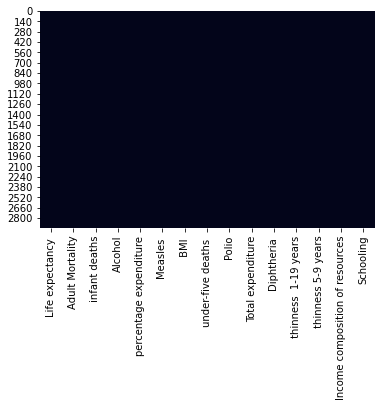

In [7]:
sns.heatmap(df.isnull(), cbar=False)

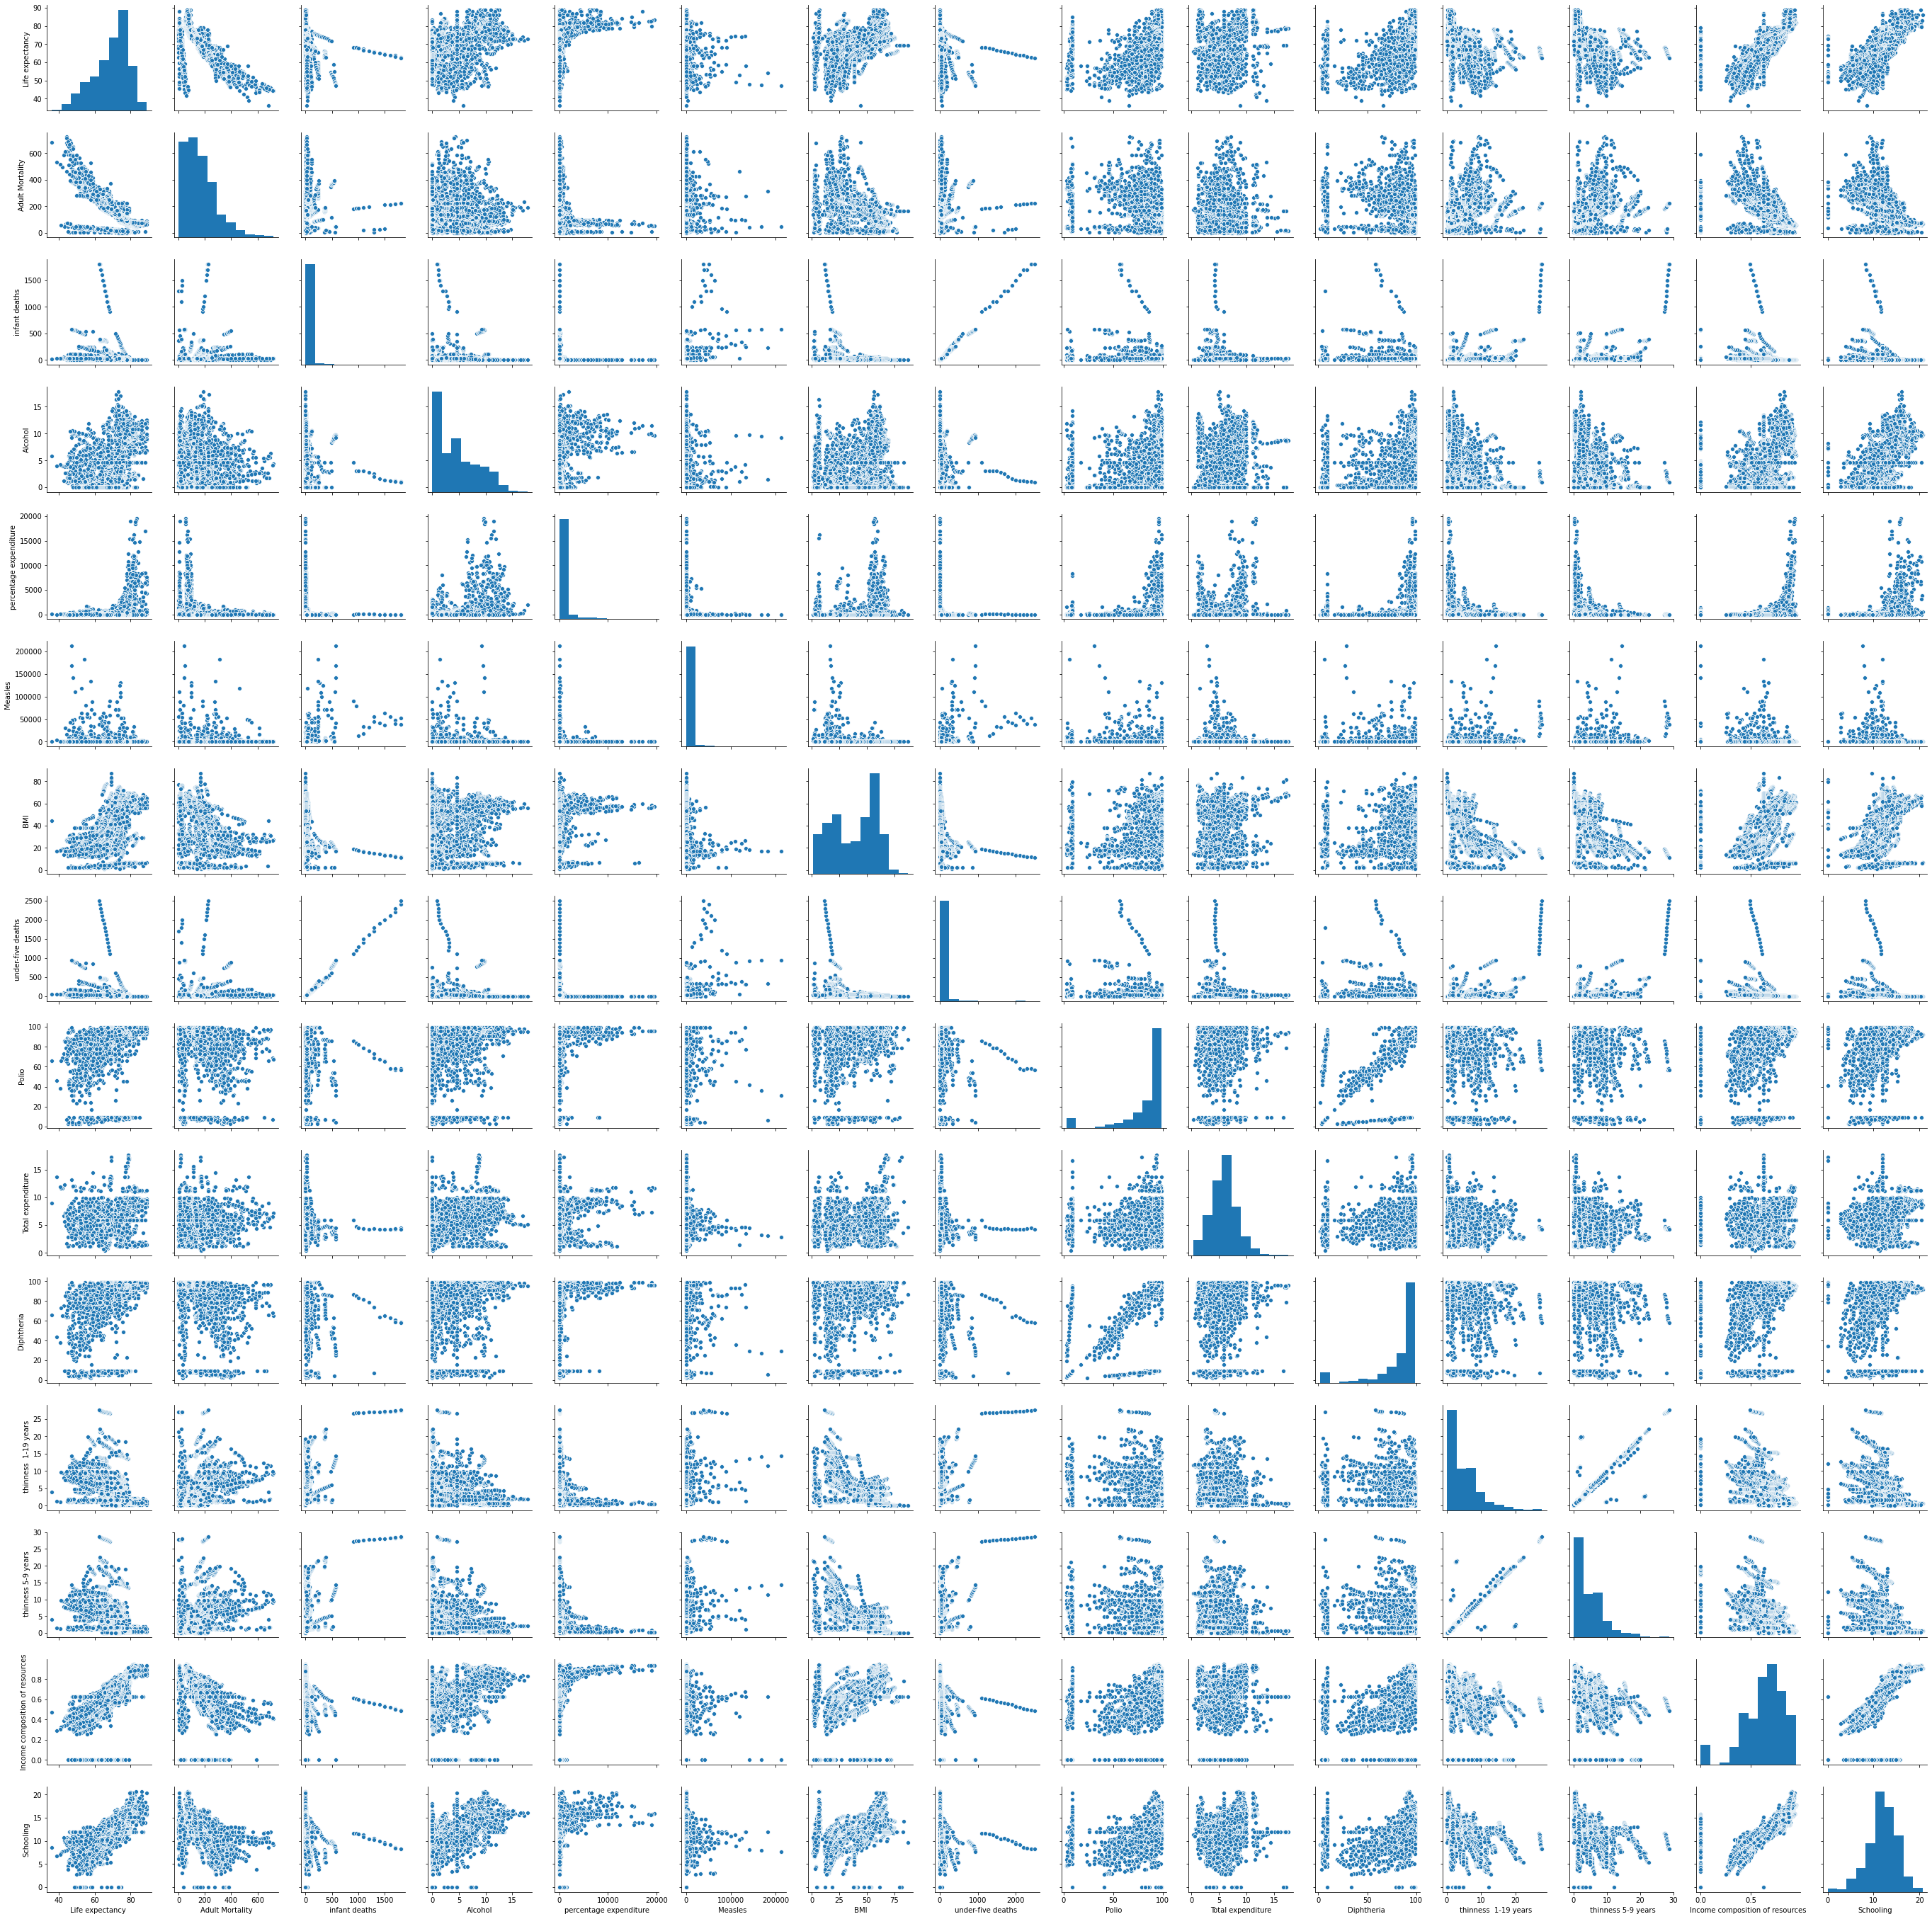

In [8]:
sns.pairplot(df)
plt.show()

In [9]:
x = df.iloc[:, df.columns != 'Life expectancy ']
y = df.iloc[:,0]


In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33)

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7675049286907808

In [12]:
y_pred = model.predict(X_test)
new_df = pd.DataFrame({"Actual" : y_test, "Predicted" : y_pred})
new_df.head()

,Actual,Predicted
2360,76.0,75.517483
1423,66.7,68.466914
212,74.9,78.603585
1865,74.5,69.090943
1505,51.9,64.190636


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
multi_poly = PolynomialFeatures(degree=4)
x_poly = multi_poly.fit_transform(X_train)

multi_poly.fit(x_poly, y_train)

In [ ]:
multi_model = LinearRegression()
multi_model.fit(x_poly, y_train)


In [ ]:
y_pred = (multi_model.predict(multi_poly.fit_transform(X_test)))
